## <div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong> Zindi Loan Credit Risk Analysis </strong></span></b> </div> 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Importing libraries</span></b> </div>

In [1]:
#Import necessary libraries for analysis. 
import pandas as pd 
import seaborn as sns 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
#set an option to display all columns
pd.set_option('display.max_columns', None)

#Read the data and assign all them to their respective variables. 
df_prevLoans = pd.read_csv('trainprevloans.csv')
df_demographics = pd.read_csv('traindemographics.csv')
df_performance = pd.read_csv('trainperf.csv')

In [3]:
df_prevLoans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [4]:
df_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [5]:
df_performance.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Data merging</span></b> </div>

In [6]:
#merge the data using left join to keep all loan perfromance details. 
df_perf_merge = pd.merge(df_performance, df_demographics, on='customerid', how='left')
df_perf_merge.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [16]:
df_perf_merge.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3787
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4343
employment_status_clients     1592
level_of_education_clients    3933
dtype: int64

In [7]:
#merge previous loans data on demographics for further analysis on demographics
df_prev_merge = pd.merge(df_prevLoans, df_demographics, on='customerid', how='left')
df_prev_merge.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1984-09-18 00:00:00.000000,Other,11.13935,10.292041,EcoBank,NaN,Permanent,NaN
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1977-10-10 00:00:00.000000,Savings,3.98577,7.491708,First Bank,NaN,Permanent,NaN


In [17]:
df_prev_merge.isna().sum()

customerid                        0
systemloanid                      0
loannumber                        0
approveddate                      0
creationdate                      0
loanamount                        0
totaldue                          0
termdays                          0
closeddate                        0
referredby                    17175
firstduedate                      0
firstrepaiddate                   0
birthdate                      4510
bank_account_type              4510
longitude_gps                  4510
latitude_gps                   4510
bank_name_clients              4510
bank_branch_clients           18099
employment_status_clients      5873
level_of_education_clients    14739
dtype: int64

In [8]:
df_perf_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4376 non-null   object 
 1   systemloanid                4376 non-null   int64  
 2   loannumber                  4376 non-null   int64  
 3   approveddate                4376 non-null   object 
 4   creationdate                4376 non-null   object 
 5   loanamount                  4376 non-null   float64
 6   totaldue                    4376 non-null   float64
 7   termdays                    4376 non-null   int64  
 8   referredby                  589 non-null    object 
 9   good_bad_flag               4376 non-null   object 
 10  birthdate                   3277 non-null   object 
 11  bank_account_type           3277 non-null   object 
 12  longitude_gps               3277 non-null   float64
 13  latitude_gps                3277 

In [9]:
df_prev_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18203 entries, 0 to 18202
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  18203 non-null  object 
 1   systemloanid                18203 non-null  int64  
 2   loannumber                  18203 non-null  int64  
 3   approveddate                18203 non-null  object 
 4   creationdate                18203 non-null  object 
 5   loanamount                  18203 non-null  float64
 6   totaldue                    18203 non-null  float64
 7   termdays                    18203 non-null  int64  
 8   closeddate                  18203 non-null  object 
 9   referredby                  1028 non-null   object 
 10  firstduedate                18203 non-null  object 
 11  firstrepaiddate             18203 non-null  object 
 12  birthdate                   13693 non-null  object 
 13  bank_account_type           136

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Explorative Data Analysis</span></b> </div>

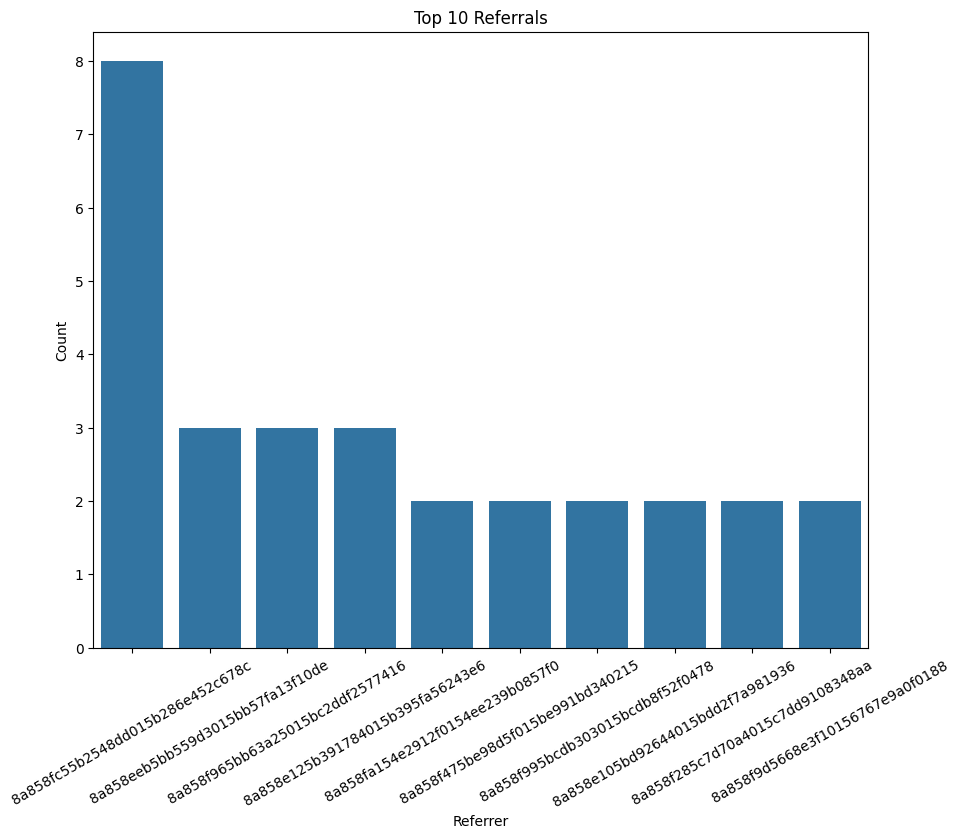

In [18]:
#Check for customers who referredpeople the most. 
import matplotlib.pyplot as plt
top_referrals = df_perf_merge['referredby'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))
plt.title('Top 10 Referrals')
plt.xlabel('Referrer')
plt.ylabel('Count')
plt.xticks(rotation=30)
sns.barplot(x=top_referrals.index, y=top_referrals.values)

plt.show()

<Axes: xlabel='termdays', ylabel='interest'>

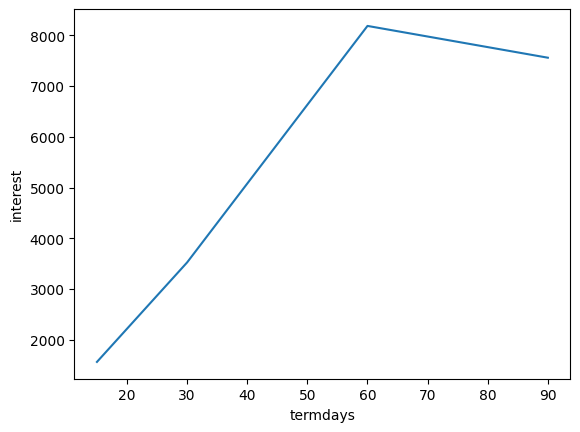

In [25]:
#Analyze how interest vary with term days. 
df_perf_merge['interest'] = df_perf_merge['totaldue'] - df_perf_merge['loanamount']
avg_interest_by_termdays = df_perf_merge.groupby('termdays')['interest'].mean().reset_index()
sns.lineplot(x='termdays', y='interest', data=avg_interest_by_termdays)

In [29]:
df_perf_merge['employment_status_clients'].value_counts()

employment_status_clients
Permanent        2348
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: count, dtype: int64

In [34]:
#top 5 banks who have high interest rates for the permanent employed
employment_status = 'Permanent' 
df_filtered = df_perf_merge[df_perf_merge['employment_status_clients'] == employment_status]
df_intcharge = df_filtered.groupby('bank_name_clients')['interest'].mean().reset_index()
top_banks = df_intcharge.sort_values(by='interest', ascending=False).head(5)


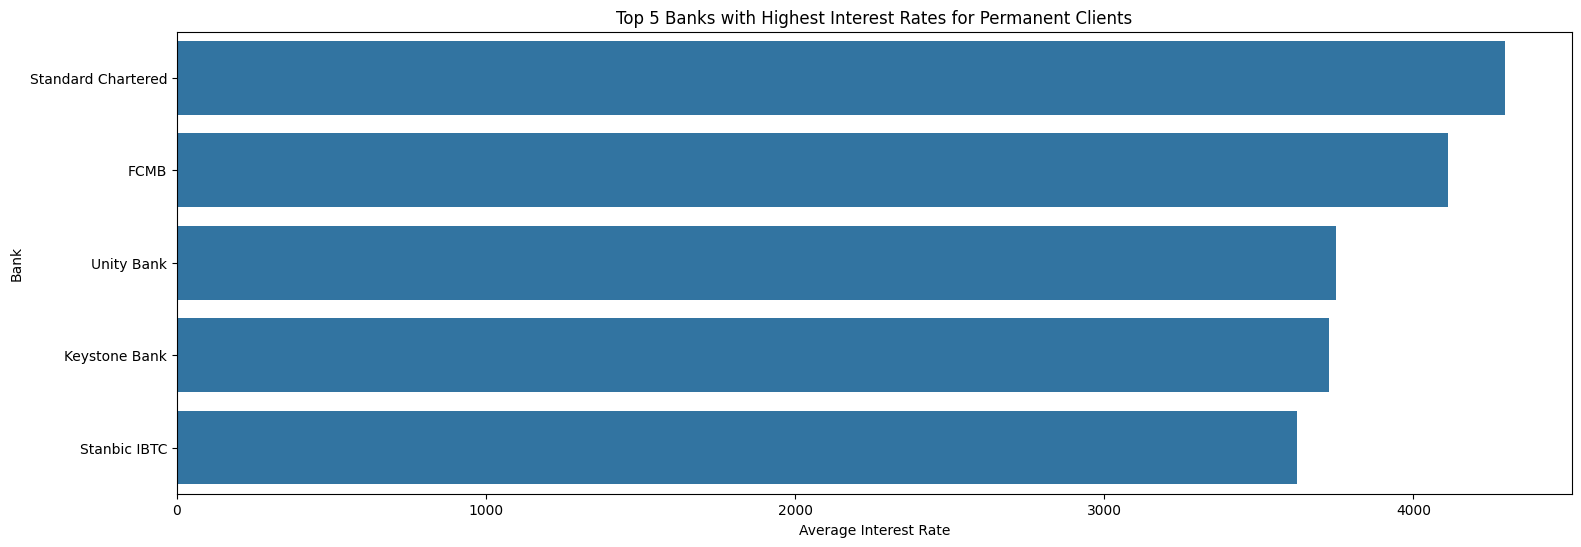

In [39]:
plt.figure(figsize=(18,6))
sns.barplot(x='interest', y='bank_name_clients', data=top_banks)
plt.title(f'Top 5 Banks with Highest Interest Rates for {employment_status} Clients')
plt.xlabel('Average Interest Rate')
plt.ylabel('Bank')
plt.show()

In [40]:
df_prev_merge['firstduedate'] = pd.to_datetime(df_prev_merge['firstduedate'])
df_prev_merge['firstrepaiddate'] = pd.to_datetime(df_prev_merge['firstrepaiddate'])
# Difference between 'firstrepaiddate' and 'firstduedate'
df_prev_merge['days_delayed'] = (df_prev_merge['firstrepaiddate'] - df_prev_merge['firstduedate']).dt.days
defaulted_loans = df_prev_merge[df_prev_merge['days_delayed'] < 0].shape[0]
# Total number of loans
total_loans = df_prev_merge.shape[0]

# Calculate default rate
default_rate = (defaulted_loans / total_loans) * 100
print(default_rate)

63.98945228808438
